<h2>analisi spesa italiana rispetto al PIL </h2>

<h4>3 grafici: </h4>
- un grafico lineare per vedere l’andamento negli anni,

- un istogramma per decenni (per capire l’evoluzione a lungo periodo),

- un boxplot per vedere la variabilità.

    Anno  Valore
19  1988   6.633
5   1989   6.619
22  1990   6.976
3   1991   7.210
32  1992   7.079


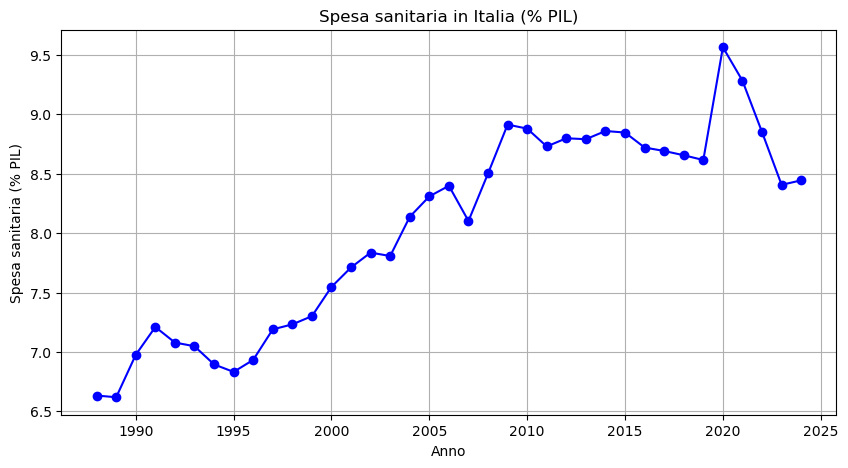

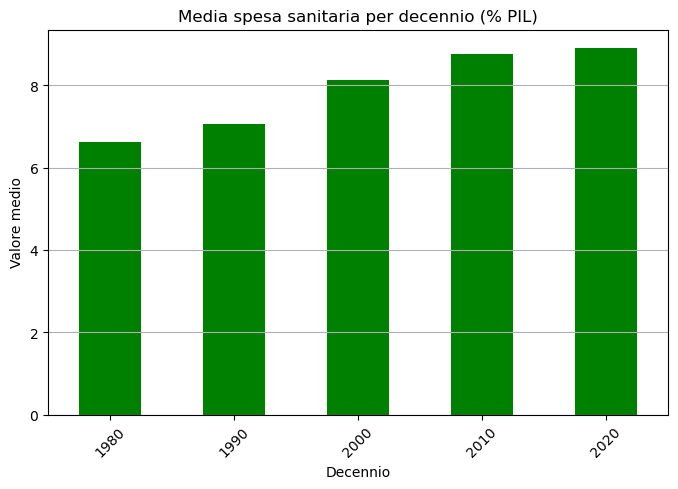

<Figure size 800x500 with 0 Axes>

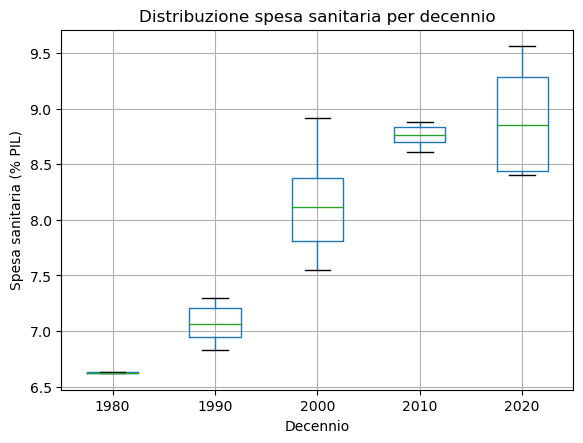

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("ita_spesa_PIL.csv")

df = df[["TIME_PERIOD", "OBS_VALUE"]]


df = df.rename(columns={"TIME_PERIOD": "Anno", "OBS_VALUE": "Valore"})


df = df.dropna()


df["Anno"] = df["Anno"].astype(int)
df["Valore"] = df["Valore"].astype(float)


df = df.sort_values("Anno")

print(df.head())  

# === Grafico 1: Andamento nel tempo ===
plt.figure(figsize=(10,5))
plt.plot(df["Anno"], df["Valore"], marker="o", color="blue")
plt.title("Spesa sanitaria in Italia (% PIL)")
plt.xlabel("Anno")
plt.ylabel("Spesa sanitaria (% PIL)")
plt.grid(True)
plt.show()

# === Grafico 2: Istogramma per decenni ===
df["Decennio"] = (df["Anno"] // 10) * 10
media_decennio = df.groupby("Decennio")["Valore"].mean()

plt.figure(figsize=(8,5))
media_decennio.plot(kind="bar", color="green")
plt.title("Media spesa sanitaria per decennio (% PIL)")
plt.xlabel("Decennio")
plt.ylabel("Valore medio")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# === Grafico 3: Boxplot per vedere variazioni ===
plt.figure(figsize=(8,5))
df.boxplot(column="Valore", by="Decennio")
plt.title("Distribuzione spesa sanitaria per decennio")
plt.suptitle("")
plt.xlabel("Decennio")
plt.ylabel("Spesa sanitaria (% PIL)")
plt.show()


<h2> aspettativa di vita

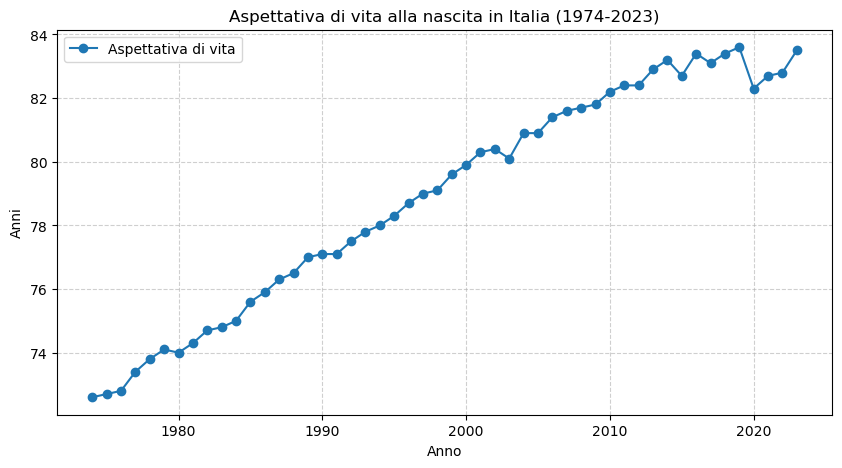

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


life = pd.read_csv("ita_life_expectancy.csv")


life["Anno"] = life["Anno"].astype(int)


plt.figure(figsize=(10,5))
plt.plot(life["Anno"], life["Italia"], marker="o", label="Aspettativa di vita")

plt.title("Aspettativa di vita alla nascita in Italia (1974-2023)")
plt.xlabel("Anno")
plt.ylabel("Anni")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()



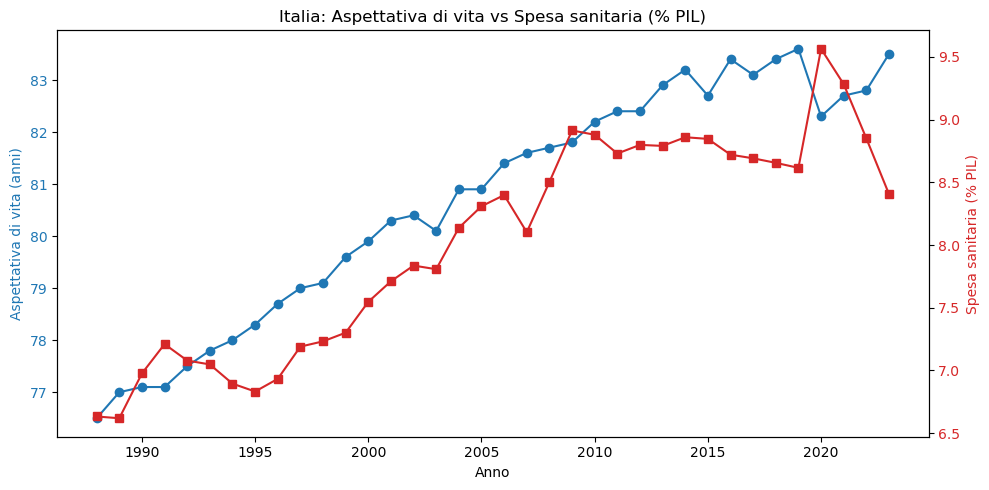

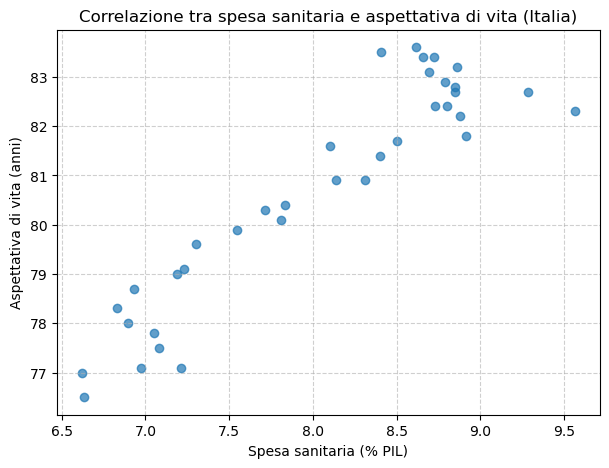

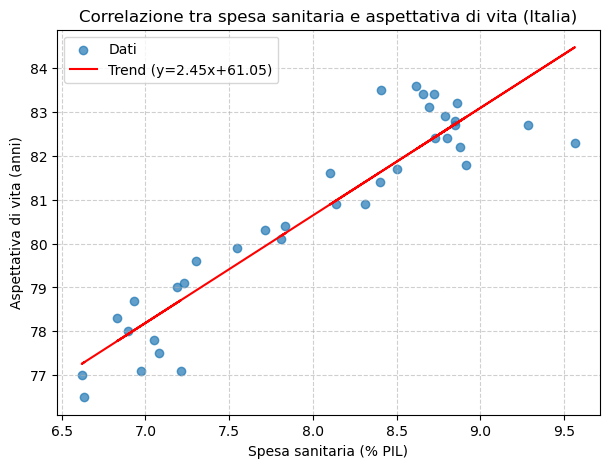

Coefficiente di correlazione di Pearson: 0.928
p-value: 3.512e-16
Interpretazione: corr va da -1 a +1. 
 vicino a +1 → forte correlazione positiva (più spesa % PIL, più alta aspettativa di vita) 
vicino a 0 → nessuna correlazione lineare
vicino a -1 → correlazione negativa (più spesa, meno aspettativa)
p-value indica la significatività statistica: se è molto piccolo (es. < 0.05), la correlazione è significativa.


In [ ]:

spesa = pd.read_csv("ita_spesa_PIL.csv")
spesa = spesa[["TIME_PERIOD", "OBS_VALUE"]]
spesa = spesa.rename(columns={"TIME_PERIOD": "Anno", "OBS_VALUE": "Spesa_PIL"})
spesa["Anno"] = spesa["Anno"].astype(int)


df = pd.merge(life, spesa, on="Anno")

# Grafico con doppio asse Y
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.set_xlabel("Anno")
ax1.set_ylabel("Aspettativa di vita (anni)", color="tab:blue")
ax1.plot(df["Anno"], df["Italia"], color="tab:blue", marker="o", label="Aspettativa di vita")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()  
ax2.set_ylabel("Spesa sanitaria (% PIL)", color="tab:red")
ax2.plot(df["Anno"], df["Spesa_PIL"], color="tab:red", marker="s", label="Spesa sanitaria/PIL")
ax2.tick_params(axis="y", labelcolor="tab:red")



plt.title("Italia: Aspettativa di vita vs Spesa sanitaria (% PIL)")
fig.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(df["Spesa_PIL"], df["Italia"], alpha=0.7)

plt.xlabel("Spesa sanitaria (% PIL)")
plt.ylabel("Aspettativa di vita (anni)")
plt.title("Correlazione tra spesa sanitaria e aspettativa di vita (Italia)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



import numpy as np

x = df["Spesa_PIL"]
y = df["Italia"]


m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(7,5))
plt.scatter(x, y, alpha=0.7, label="Dati")
plt.plot(x, m*x + b, color="red", label=f"Trend (y={m:.2f}x+{b:.2f})")

plt.xlabel("Spesa sanitaria (% PIL)")
plt.ylabel("Aspettativa di vita (anni)")
plt.title("Correlazione tra spesa sanitaria e aspettativa di vita (Italia)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


from scipy.stats import pearsonr


x = df["Spesa_PIL"]
y = df["Italia"]


corr, pval = pearsonr(x, y)

print(f"Coefficiente di correlazione di Pearson: {corr:.3f}")
print(f"p-value: {pval:.3e}")

print("Interpretazione: corr va da -1 a +1. \n vicino a +1 → forte correlazione positiva (più spesa % PIL, più alta aspettativa di vita) \nvicino a 0 → nessuna correlazione lineare\nvicino a -1 → correlazione negativa (più spesa, meno aspettativa)\np-value indica la significatività statistica: se è molto piccolo (es. < 0.05), la correlazione è significativa.")


Correlazione mobile (quanto cambia nel tempo il legame)

Δ anno su anno (quanto crescono spesa e vita)

Scatter + regressione (correlazione diretta e variazioni)

Regressione lineare con R² (quanto la spesa spiega l’aspettativa)

Sintesi visiva (grafico con doppio asse)

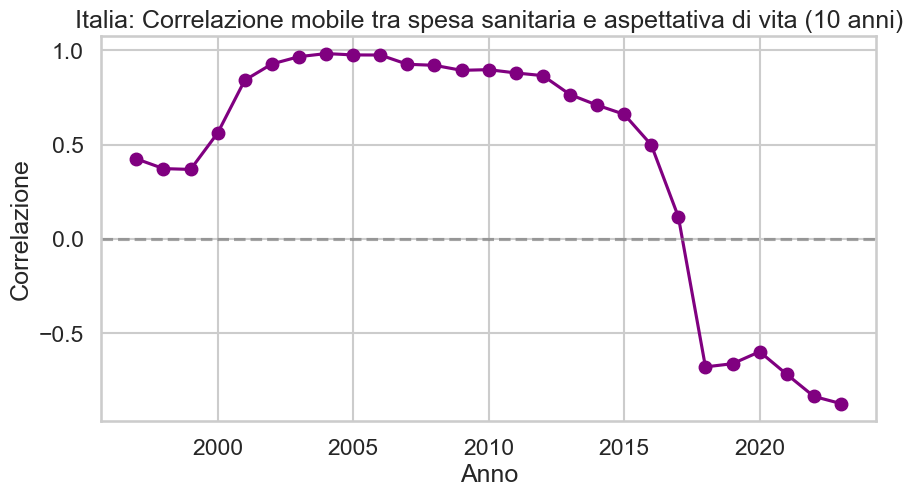

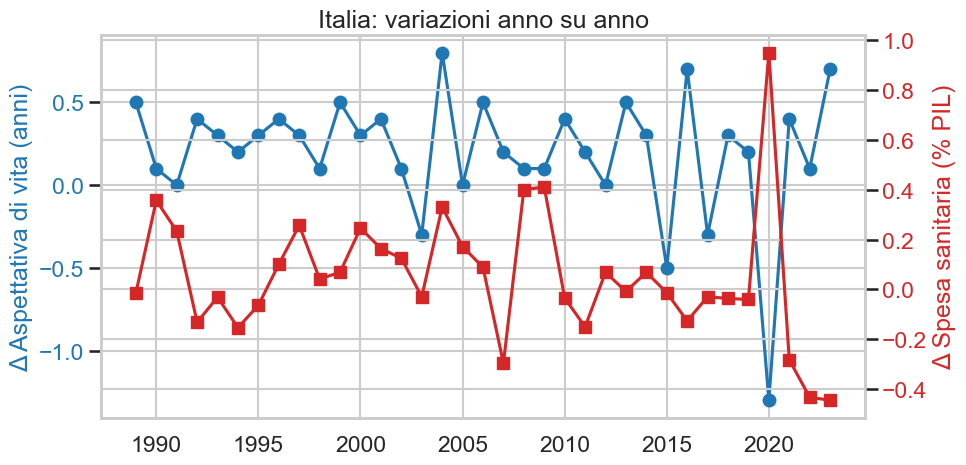

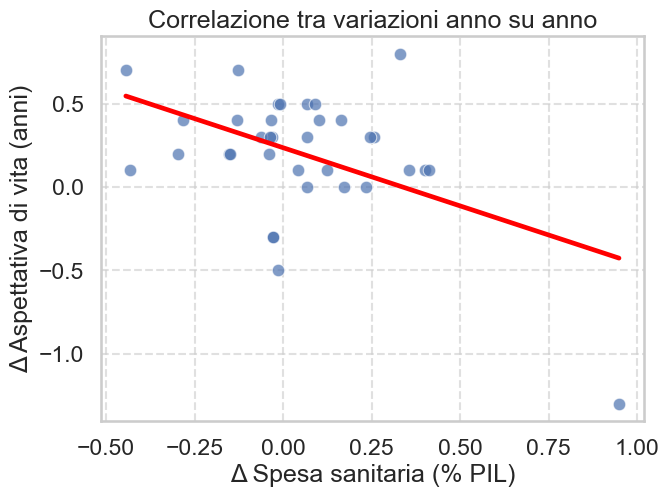

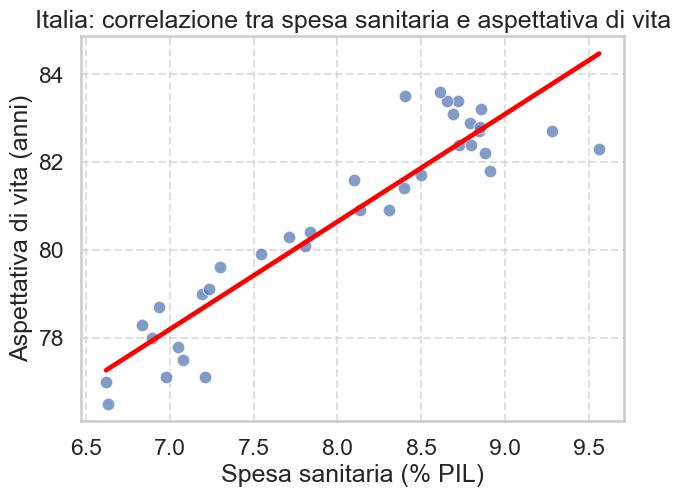

Modello lineare: Aspettativa = 2.45 * Spesa_PIL + 61.05
R² = 0.862


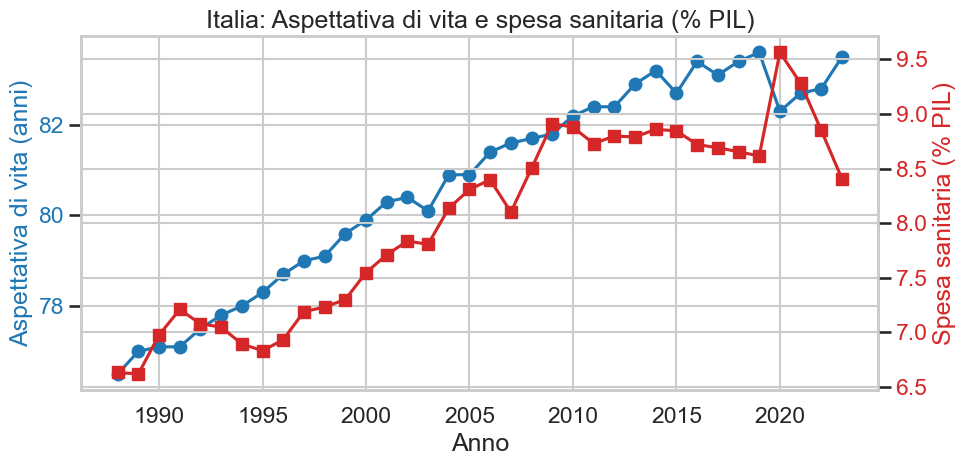

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.set(style="whitegrid", context="talk")


# 1. Correlazione mobile

window = 10  # finestra mobile di 10 anni
df["corr_mobile"] = df["Italia"].rolling(window).corr(df["Spesa_PIL"])

plt.figure(figsize=(10,5))
plt.plot(df["Anno"], df["corr_mobile"], marker="o", color="purple")
plt.axhline(0, color="gray", linestyle="--", alpha=0.7)
plt.title(f"Italia: Correlazione mobile tra spesa sanitaria e aspettativa di vita ({window} anni)")
plt.xlabel("Anno")
plt.ylabel("Correlazione")
plt.show()


# 2. Variazioni anno su anno

df["delta_vita"] = df["Italia"].diff()
df["delta_spesa"] = df["Spesa_PIL"].diff()

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(df["Anno"], df["delta_vita"], marker="o", color="tab:blue", label="Δ Aspettativa di vita")
ax1.set_ylabel("Δ Aspettativa di vita (anni)", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.plot(df["Anno"], df["delta_spesa"], marker="s", color="tab:red", label="Δ Spesa sanitaria/PIL")
ax2.set_ylabel("Δ Spesa sanitaria (% PIL)", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

plt.title("Italia: variazioni anno su anno")
fig.tight_layout()
plt.show()

# Scatter delle variazioni
plt.figure(figsize=(7,5))
sns.scatterplot(x="delta_spesa", y="delta_vita", data=df, alpha=0.7)
sns.regplot(x="delta_spesa", y="delta_vita", data=df, scatter=False, color="red", ci=None)
plt.xlabel("Δ Spesa sanitaria (% PIL)")
plt.ylabel("Δ Aspettativa di vita (anni)")
plt.title("Correlazione tra variazioni anno su anno")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# 3. Scatter e regressione globale

plt.figure(figsize=(7,5))
sns.scatterplot(x="Spesa_PIL", y="Italia", data=df, alpha=0.7)
sns.regplot(x="Spesa_PIL", y="Italia", data=df, scatter=False, color="red", ci=None)
plt.xlabel("Spesa sanitaria (% PIL)")
plt.ylabel("Aspettativa di vita (anni)")
plt.title("Italia: correlazione tra spesa sanitaria e aspettativa di vita")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# 4. Regressione lineare e R^2

from sklearn.linear_model import LinearRegression

X = df["Spesa_PIL"].dropna().values.reshape(-1,1)
y = df["Italia"].dropna().values

model = LinearRegression()
model.fit(X, y)

r2 = model.score(X, y)
coef = model.coef_[0]
intercept = model.intercept_

print(f"Modello lineare: Aspettativa = {coef:.2f} * Spesa_PIL + {intercept:.2f}")
print(f"R² = {r2:.3f}")


# 5. Sintesi visiva: doppio asse

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.set_xlabel("Anno")
ax1.set_ylabel("Aspettativa di vita (anni)", color="tab:blue")
ax1.plot(df["Anno"], df["Italia"], color="tab:blue", marker="o", label="Aspettativa di vita")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Spesa sanitaria (% PIL)", color="tab:red")
ax2.plot(df["Anno"], df["Spesa_PIL"], color="tab:red", marker="s", label="Spesa sanitaria/PIL")
ax2.tick_params(axis="y", labelcolor="tab:red")

plt.title("Italia: Aspettativa di vita e spesa sanitaria (% PIL)")
fig.tight_layout()
plt.show()


<h1> paragone tra italia e media europea

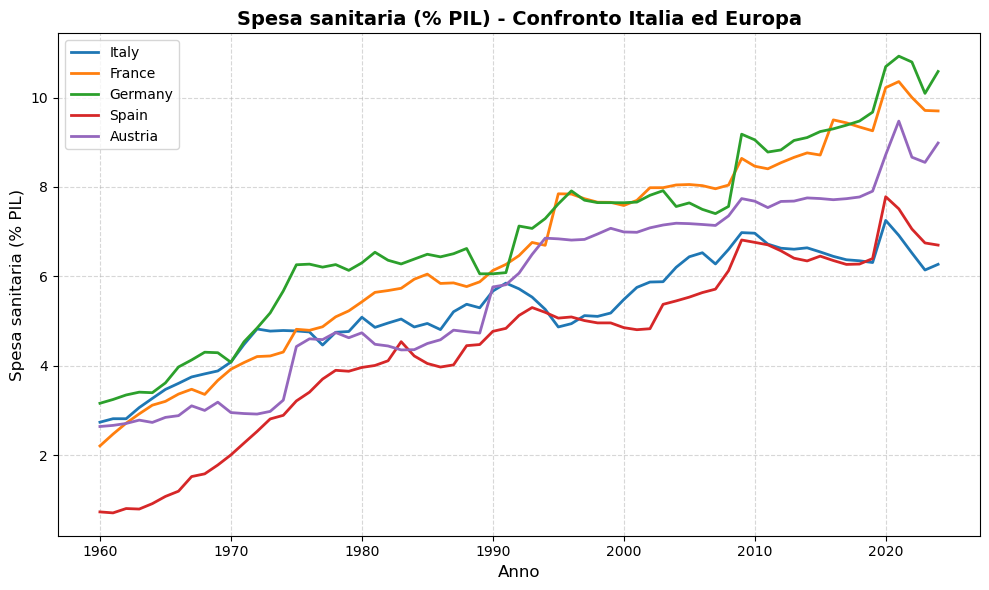

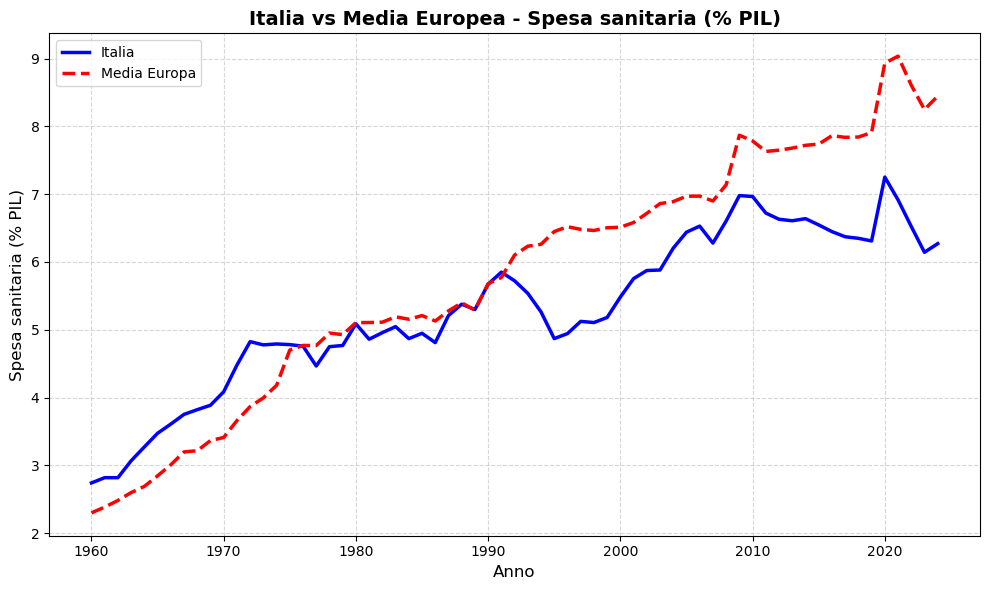

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("public-health-expenditure-share-gdp.csv")


df = df.rename(columns={
    "Entity": "Paese",
    "Code": "Codice",
    "Year": "Anno",
    "Public health expenditure as a share of GDP": "Spesa_PIL"
})


df["Anno"] = df["Anno"].astype(int)


df = df[df["Anno"] >= 1960]


df = df[df["Spesa_PIL"] > 0]


paesi = ["Italy", "France", "Germany", "Spain", "Austria"]
df_eu = df[df["Paese"].isin(paesi)]
df_media = df_eu.groupby("Anno")["Spesa_PIL"].mean().reset_index()



plt.figure(figsize=(10,6))
for paese in paesi:
    dati = df_eu[df_eu["Paese"] == paese]
    plt.plot(
        dati["Anno"], dati["Spesa_PIL"], 
        linewidth=2, label=paese
    )

plt.title("Spesa sanitaria (% PIL) - Confronto Italia ed Europa", fontsize=14, fontweight="bold")
plt.xlabel("Anno", fontsize=12)
plt.ylabel("Spesa sanitaria (% PIL)", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# --- Italia vs Media Europea ---
plt.figure(figsize=(10,6))
plt.plot(
    df_eu[df_eu["Paese"]=="Italy"]["Anno"], 
    df_eu[df_eu["Paese"]=="Italy"]["Spesa_PIL"], 
    linewidth=2.5, color="blue", label="Italia"
)

plt.plot(
    df_media["Anno"], df_media["Spesa_PIL"], 
    linewidth=2.5, color="red", linestyle="--", label="Media Europa"
)

plt.title("Italia vs Media Europea - Spesa sanitaria (% PIL)", fontsize=14, fontweight="bold")
plt.xlabel("Anno", fontsize=12)
plt.ylabel("Spesa sanitaria (% PIL)", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


<h1>confronto del rapporto tra spesa e aspettativa di vita tra italia e paesi membri dell'UE  </h1>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('aspettativa_vita_paesi_oecd.csv', skiprows=4)


df_clean = df.drop(columns=['Indicator Name', 'Indicator Code', 'Country Code', '2023', '2024'])


df_clean.rename(columns={'Country Name': 'Country'}, inplace=True)


eu_countries = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
    'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
    'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania',
    'Slovak Republic', 'Slovenia', 'Spain', 'Sweden'
]


df_eu = df_clean[df_clean['Country'].isin(eu_countries)].copy()


df_eu.set_index('Country', inplace=True)


df_eu = df_eu.apply(pd.to_numeric, errors='coerce')


italy_le = df_eu.loc['Italy']
eu_average_le = df_eu.drop('Italy').mean(axis=0)


df_comparison = pd.DataFrame({
    'Italy': italy_le,
    'EU Average': eu_average_le
})


print(df_comparison.tail())

                 Italy  EU Average
2019         83.497561   80.199075
2020         82.195122   79.481454
2021         82.646341   78.938830
2022         82.700000   79.680698
Unnamed: 69        NaN         NaN


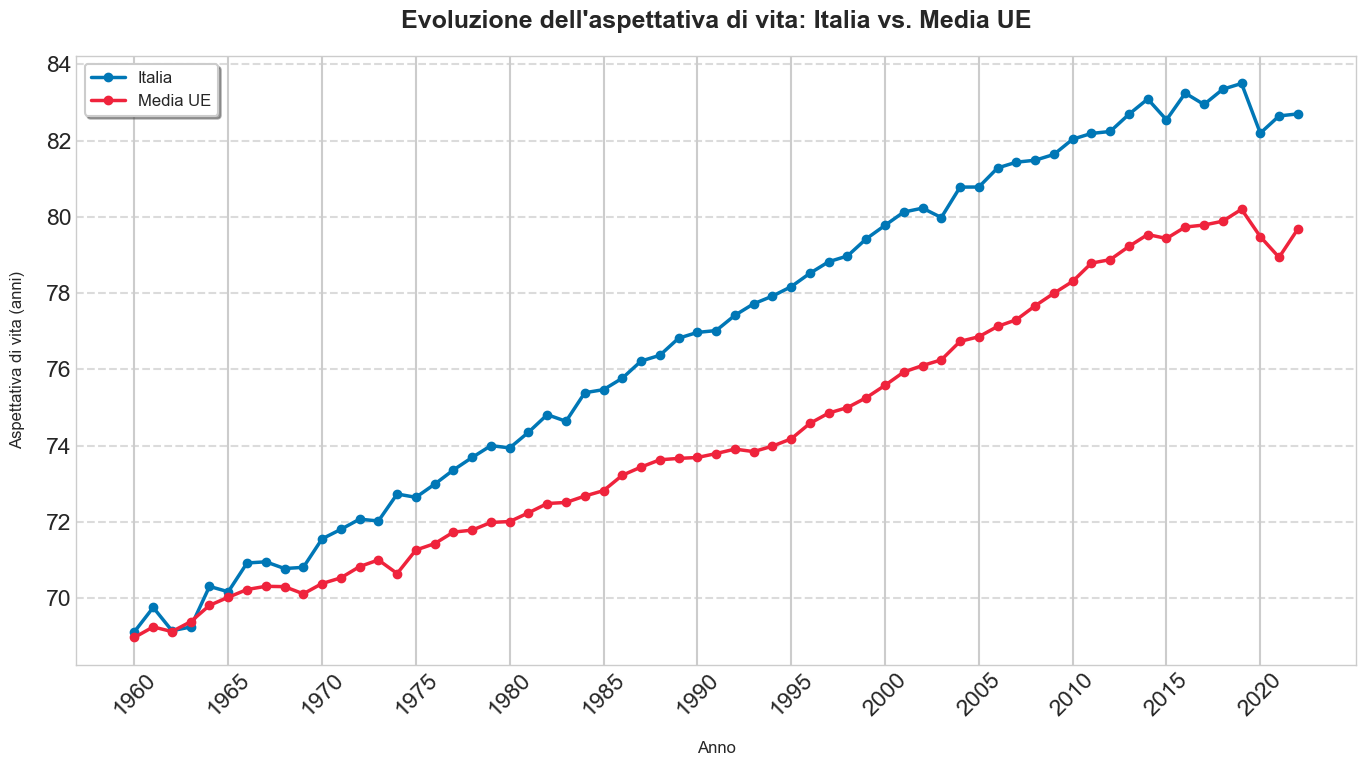

In [ ]:

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))


plt.plot(df_comparison.index, df_comparison['Italy'], label='Italia', marker='o', color='#0077b6', linewidth=2.5, markersize=6)
plt.plot(df_comparison.index, df_comparison['EU Average'], label='Media UE', marker='o', color='#ef233c', linewidth=2.5, markersize=6)


plt.title('Evoluzione dell\'aspettativa di vita: Italia vs. Media UE', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Anno', fontsize=12, labelpad=15)
plt.ylabel('Aspettativa di vita (anni)', fontsize=12, labelpad=15)


plt.xticks(df_comparison.index[::5], rotation=45) 

plt.legend(fontsize=12, loc='upper left', frameon=True, fancybox=True, shadow=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

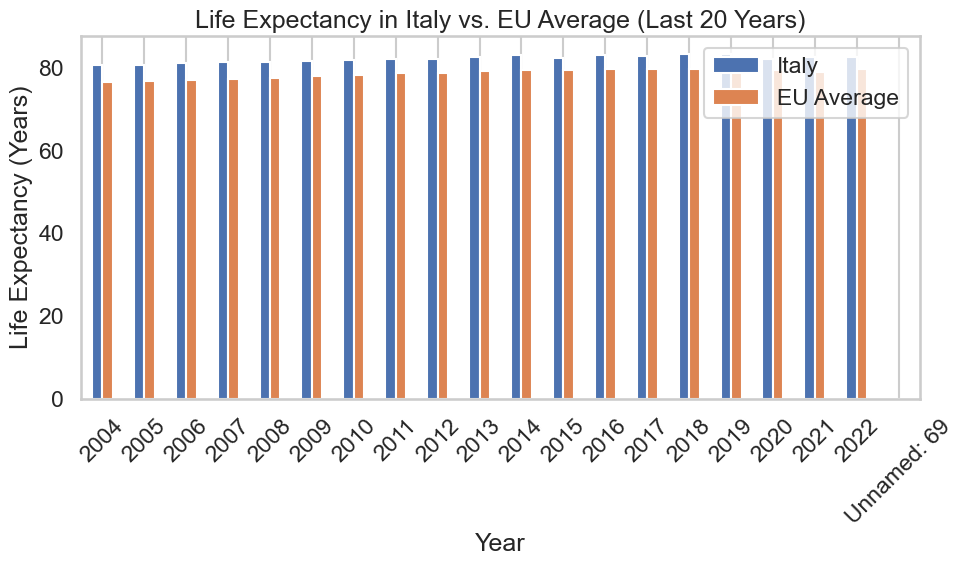

In [26]:
last_20_years = df_comparison.tail(20)

last_20_years.plot(kind='bar', figsize=(10, 6))
plt.title('Life Expectancy in Italy vs. EU Average (Last 20 Years)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (Years)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


df = pd.read_csv('aspettativa_vita_paesi_oecd.csv', skiprows=4)


selected_countries = ['Italy', 'Spain', 'Germany', 'France', 'Austria', 'Switzerland']


df_filtered = df[df['Country Name'].isin(selected_countries)].copy()


df_filtered = df_filtered.drop(columns=['Indicator Name', 'Indicator Code', 'Country Code', '2023', '2024'])


df_filtered = df_filtered.set_index('Country Name').T


df_filtered.index.name = 'Year'


df_filtered = df_filtered.apply(pd.to_numeric, errors='coerce')


print(df_filtered.tail())

Country Name    Austria  Switzerland    Germany      Spain     France  \
Year                                                                    
2019          81.895122    83.904878  81.292683  83.831707  82.826829   
2020          81.192683    83.000000  81.041463  82.231707  82.175610   
2021          81.190244    83.751220  80.790244  83.178049  82.324390   
2022          81.295122    83.604878  80.608049  83.134146  82.129268   
Unnamed: 69         NaN          NaN        NaN        NaN        NaN   

Country Name      Italy  
Year                     
2019          83.497561  
2020          82.195122  
2021          82.646341  
2022          82.700000  
Unnamed: 69         NaN  


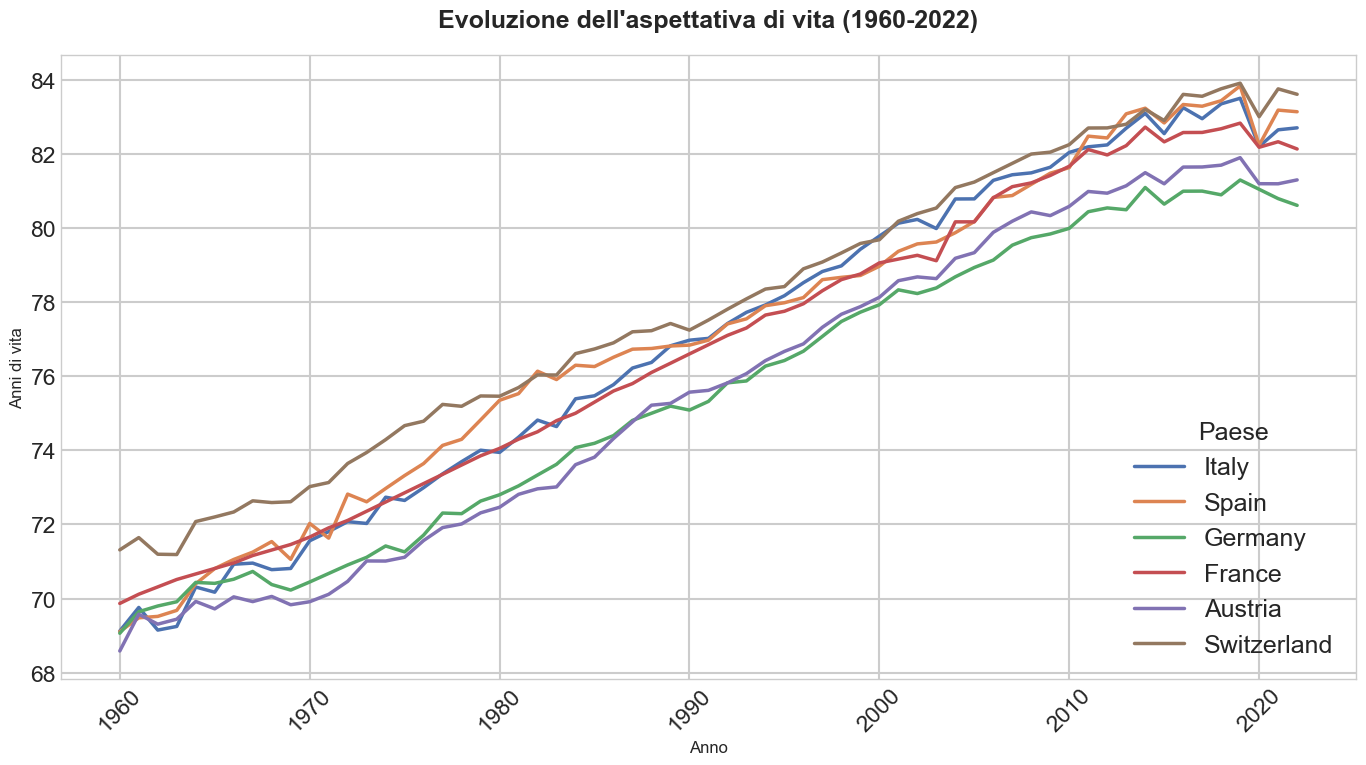

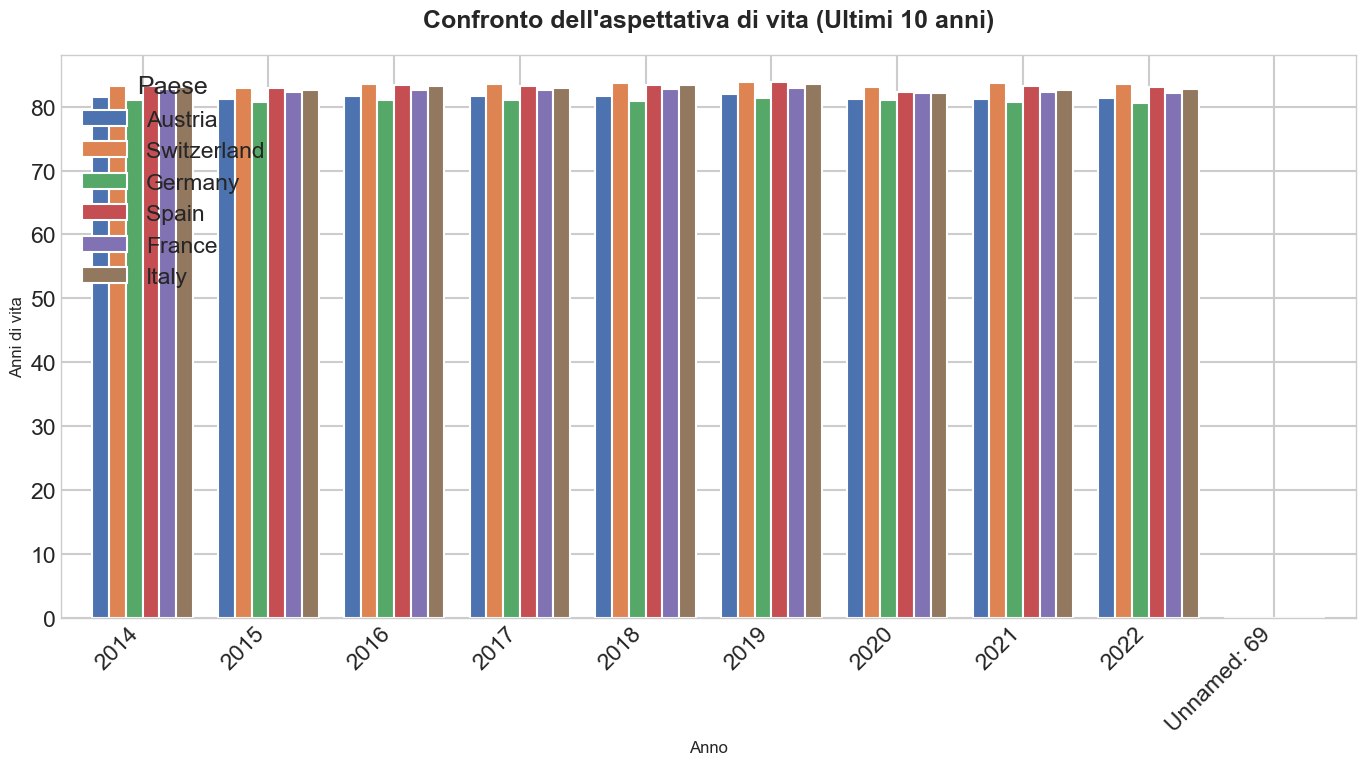

In [30]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

# Genera il grafico a linee
for country in selected_countries:
    plt.plot(df_filtered.index, df_filtered[country], label=country, linewidth=2.5)

plt.title('Evoluzione dell\'aspettativa di vita (1960-2022)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Anni di vita', fontsize=12)

# Formatta l'asse x per mostrare gli anni in modo più leggibile
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xticks(rotation=45)
plt.legend(title='Paese', loc='lower right', fontsize='medium')
plt.tight_layout()
plt.show()

# Seleziona gli ultimi 10 anni di dati
last_10_years = df_filtered.tail(10)

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

# Crea il grafico a barre
last_10_years.plot(kind='bar', ax=ax, width=0.8)

plt.title('Confronto dell\'aspettativa di vita (Ultimi 10 anni)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Anni di vita', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Paese', loc='upper left')
plt.tight_layout()
plt.show()

              Life Expectancy  Health Expenditure (% of GDP)
Country Name                                                
Italy               82.646341                          6.917
Spain               83.178049                          7.511
Germany             80.790244                         10.925
France              82.324390                         10.357
Austria             81.190244                          9.473
Switzerland         83.751220                          8.201


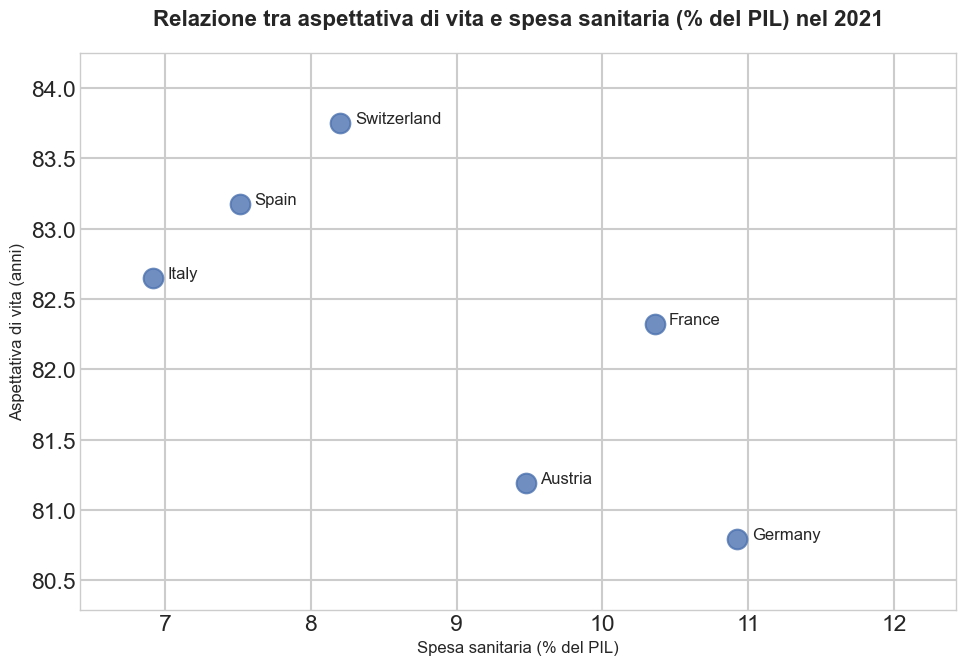

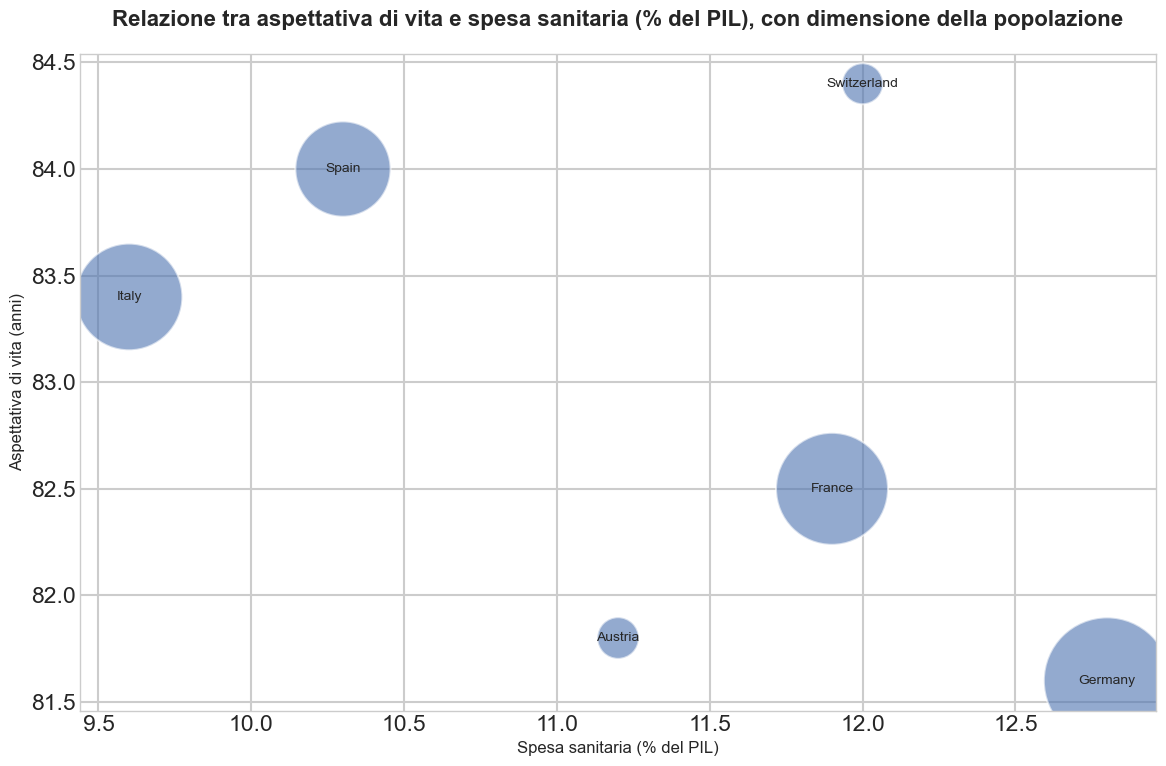

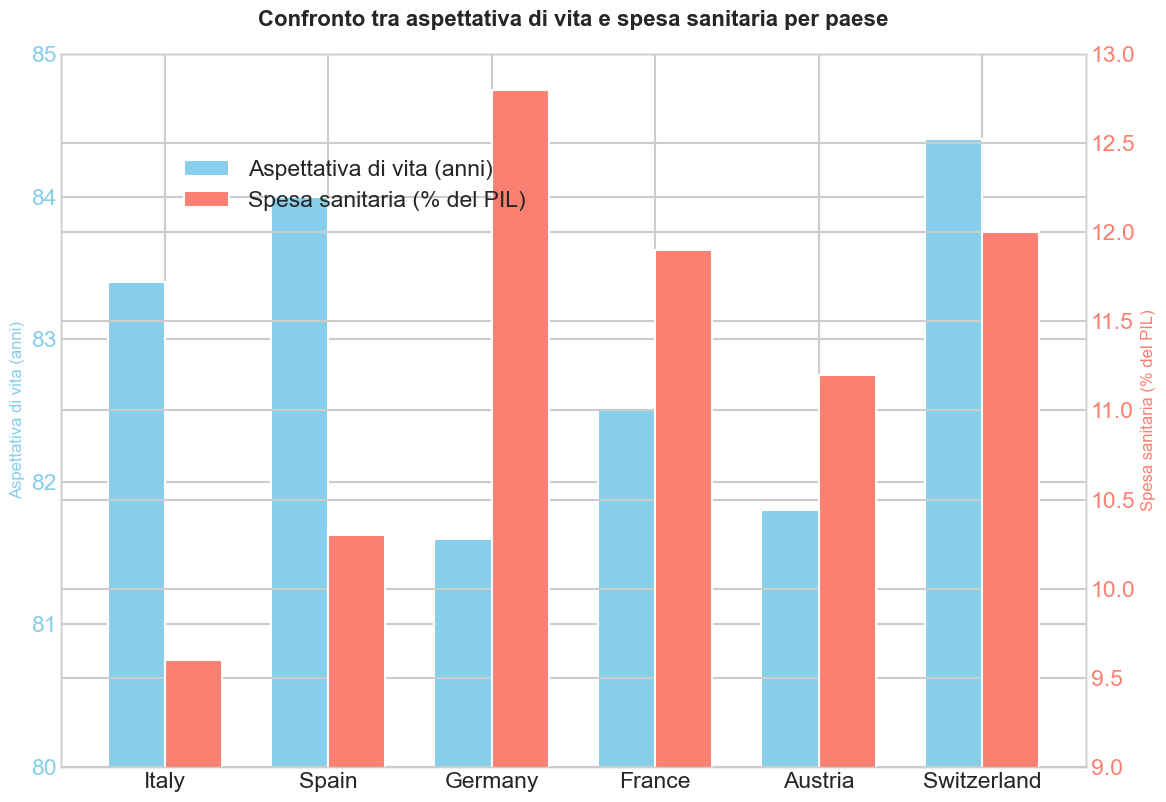

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df_le = pd.read_csv('aspettativa_vita_paesi_oecd.csv', skiprows=4)
df_le = df_le.set_index('Country Name').drop(columns=['Indicator Name', 'Indicator Code', 'Country Code', '2023', '2024']).T
df_le.index.name = 'Year'
df_le = df_le.apply(pd.to_numeric, errors='coerce')


df_he = pd.read_csv('public-health-expenditure-share-gdp.csv')


df_he.rename(columns={'Entity': 'Country Name', 'Public health expenditure as a share of GDP': 'Health Expenditure (% of GDP)'}, inplace=True)


selected_countries = ['Italy', 'Spain', 'Germany', 'France', 'Austria', 'Switzerland']
df_he_filtered = df_he[df_he['Country Name'].isin(selected_countries)].copy()


df_he_pivot = df_he_filtered.pivot(index='Year', columns='Country Name', values='Health Expenditure (% of GDP)')


year_to_analyze = '2021'
try:
    le_data = df_le.loc[year_to_analyze, selected_countries]
    he_data = df_he_pivot.loc[int(year_to_analyze), selected_countries] 
except KeyError:
    print(f"I dati per l'anno {year_to_analyze} non sono disponibili per tutti i paesi in entrambi i dataset.")


df_combined = pd.DataFrame({
    'Life Expectancy': le_data,
    'Health Expenditure (% of GDP)': he_data
})


df_combined.dropna(inplace=True)

print(df_combined)


plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 7))


scatter = plt.scatter(df_combined['Health Expenditure (% of GDP)'], df_combined['Life Expectancy'], s=200, alpha=0.8)


for country, row in df_combined.iterrows():
    plt.text(row['Health Expenditure (% of GDP)'] + 0.1, row['Life Expectancy'], country, fontsize=12)


plt.title(f'Relazione tra aspettativa di vita e spesa sanitaria (% del PIL) nel {year_to_analyze}', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Spesa sanitaria (% del PIL)', fontsize=12)
plt.ylabel('Aspettativa di vita (anni)', fontsize=12)


plt.xlim(df_combined['Health Expenditure (% of GDP)'].min() - 0.5, df_combined['Health Expenditure (% of GDP)'].max() + 1.5)
plt.ylim(df_combined['Life Expectancy'].min() - 0.5, df_combined['Life Expectancy'].max() + 0.5)

plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt


data = {
    'Country': ['Italy', 'Spain', 'Germany', 'France', 'Austria', 'Switzerland'],
    'Life Expectancy': [83.4, 84.0, 81.6, 82.5, 81.8, 84.4],
    'Health Expenditure (% of GDP)': [9.6, 10.3, 12.8, 11.9, 11.2, 12.0],
    'Population': [59, 47, 83, 65, 9, 8.7]  
}
df_combined = pd.DataFrame(data)


plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))


size = df_combined['Population'] * 100

plt.scatter(
    df_combined['Health Expenditure (% of GDP)'], 
    df_combined['Life Expectancy'], 
    s=size, 
    alpha=0.6, 
    edgecolors='w', 
    linewidth=1.5
)


for i, country in enumerate(df_combined['Country']):
    plt.text(
        df_combined['Health Expenditure (% of GDP)'][i], 
        df_combined['Life Expectancy'][i], 
        country, 
        ha='center', 
        va='center', 
        fontsize=10
    )

plt.title('Relazione tra aspettativa di vita e spesa sanitaria (% del PIL), con dimensione della popolazione', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Spesa sanitaria (% del PIL)', fontsize=12)
plt.ylabel('Aspettativa di vita (anni)', fontsize=12)

plt.tight_layout()
plt.show()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = {
    'Country': ['Italy', 'Spain', 'Germany', 'France', 'Austria', 'Switzerland'],
    'Life Expectancy': [83.4, 84.0, 81.6, 82.5, 81.8, 84.4],
    'Health Expenditure (% of GDP)': [9.6, 10.3, 12.8, 11.9, 11.2, 12.0]
}
df = pd.DataFrame(data)
df.set_index('Country', inplace=True)


fig, ax1 = plt.subplots(figsize=(12, 8))


bar_width = 0.35
index = np.arange(len(df))

rects1 = ax1.bar(index, df['Life Expectancy'], bar_width, label='Aspettativa di vita (anni)', color='skyblue')
ax1.set_ylabel('Aspettativa di vita (anni)', color='skyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_ylim(80, 85) 


ax2 = ax1.twinx()
rects2 = ax2.bar(index + bar_width, df['Health Expenditure (% of GDP)'], bar_width, label='Spesa sanitaria (% del PIL)', color='salmon')
ax2.set_ylabel('Spesa sanitaria (% del PIL)', color='salmon', fontsize=12)
ax2.tick_params(axis='y', labelcolor='salmon')
ax2.set_ylim(9, 13) 


fig.tight_layout()
ax1.set_title('Confronto tra aspettativa di vita e spesa sanitaria per paese', fontsize=16, fontweight='bold', pad=20)
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(df.index)
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.85))

plt.show()

